## Luis Manuel García Muñoz (lmanuel.garciam@gmail.com)

We import the necessary packages.

In [0]:
# Plotting library
import matplotlib.pyplot as plt
plt.style.use('default') # Plots will be displayed in default style   
# Numeric library
import numpy as np

# Data analysis library
import pandas as pd

# To read zip files
import zipfile

# To clear outputs
from IPython.display import clear_output

# To print HTML
from IPython.display import HTML

# To use 3D plotting library (plotly): 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)

!pip install celluloid

from celluloid import Camera

clear_output()

The following code must be run to have access to files located in Google Drive. 

In [2]:
# To make files in google drive accesible from Google Colab

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Please, insert your own path.

In [0]:
# Files are located in PATH
PATH = 'drive/My Drive/MEFC - BBVA/T8 - Machine Learning/Logistic Regression/'

# To be able to import python files
import sys
sys.path.insert(0, PATH)

To plot images

In [0]:
from plot_image import plot_image

# Classification problems

Cuando la variable $Y$ no es un numero si no una categoria (por ejemplo Perro/Gato), se utilizan regresiones logisticas.

So far, the variable $Y$ that we wanted to predict was a scalar. In some applications $Y$ is categorical. 

Let's denote by $n_c$ the number of categories.

We will distinguish between $n_c=2$ and $n_c>2$.

# Logistic regression

Logistic regression is the alternative to linear regression when the value we want to predict can only take two values / categories (0, 1), (True, False), (Cat, Dog), ...

From now onwards, we will assume that the two values or categories are mapped to $\{0,1\}$

As can be seen with the following example, linear regression is not convenient for this purpose.

Let's see how linear regression works for a classification problem with 2 outcomes:

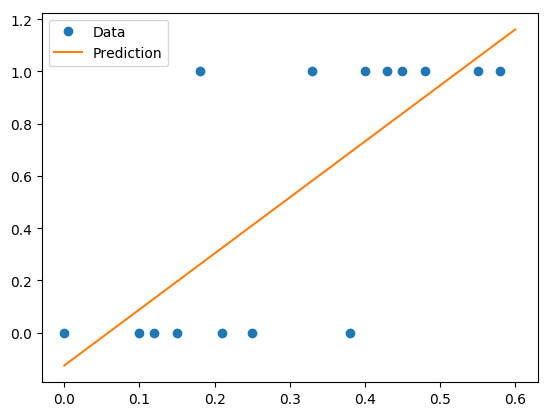

In [5]:
# X & Y values:
X = np.array([[0, 0.1, 0.12, 0.15, 0.18, 0.21, 0.25, 0.33, 0.38, 0.4, 0.43, 0.45, 0.48 ,0.55, 0.58]]).T
Y = np.array([[0, 0, 0 ,0 ,1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]]).T

# We plot X & Y
plt.plot(X,Y, 'o', label = 'Data')

# We fit a linear regression to X & Y. We use sklearn 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)

# Let's see what our model predicts for a grid of X values
X_to_predict = np.linspace(0,0.6).reshape(-1,1)
Y_predict = reg.predict(X_to_predict) 

# We plot the prediction
plt.plot(X_to_predict, Y_predict, label = 'Prediction')

plt.legend();

Podemos ver que este tipo de regresión (la lineal) no vale

As can be seen in the last figure, the output of linear regression is unbounded (does not lie in the $[0,1]$ interval). Furthermore, it is heavily influenced by extreme observations that might add no relevant information.

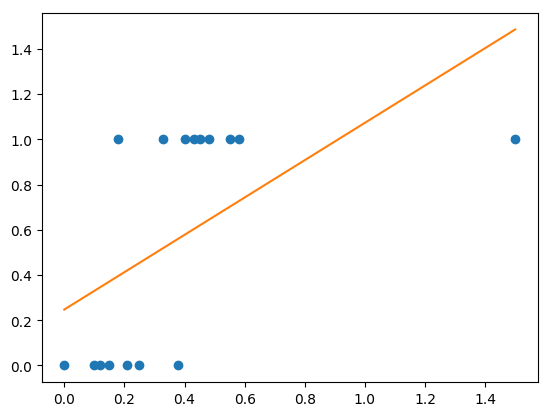

In [6]:
# We add a new pair of X-Y values with a high value of X and a expected Y value of 1
X_new = np.concatenate((X,[[1.5]]), axis = 0)
Y_new = np.concatenate((Y,[[1]]), axis = 0)

# We plot the data
plt.plot(X_new, Y_new, 'o')

# We fit the linear regression model
reg = LinearRegression().fit(X_new, Y_new)

# Let's see what our model predicts for a grid of X values
X_to_predict = np.linspace(0,1.5).reshape(-1,1)
Y_predict = reg.predict(X_to_predict) 

# We plot the prediction
plt.plot(X_to_predict, Y_predict);

Vemos que con el outlier, en una regresión lineal, afecta mucho a la recta de regresión. 

In such a framework, given some train data $X_{train}, Y_{train}$ and an incoming set of features $X$, we would like to predict the following conditional probability:

$$\widetilde{Y} = P\left[Y=1 | X\right]$$

Therefore, the output of our prediction must lie in the $[0,1]$ interval. 

In order to guarantee that, we will assume that this conditional probability is a transformation of a linear function of $X$ that maps this unbounded linear function to the $[0,1]$ interval. In order to do so, we will use the sigmoid function 

$$\sigma(z) = \frac{1}{1+\exp{(-z)}}$$

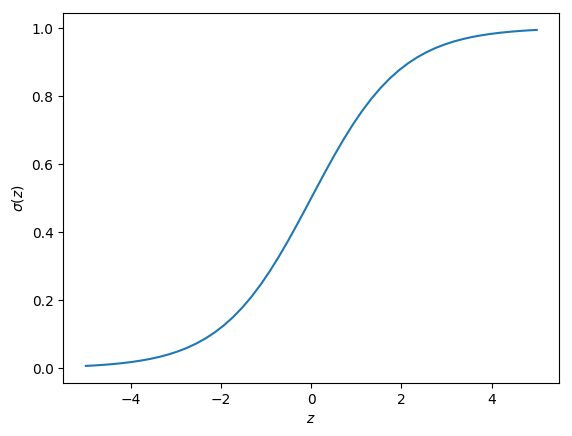

In [7]:
# We define the sigmoid function
sigmoid = lambda z: 1/(1+np.exp(-z))

# We represent the sigmoid function
z = np.linspace(-5,5)
sig = sigmoid(z)

plt.plot(z, sig)
plt.xlabel(r'$z$')
plt.ylabel(r'$\sigma(z)$');

So that given a feature vector $X$, $P\left[Y=1 | X\right]$ will be given by

$P\left[Y=1 | X\right] = \frac{1}{1+\exp{(-\theta^TX)}}$  [1]

Where $\theta$ is a vector of the same length as $X$ that represents the model parameters.

Notice that if we wanted the linear relationship to carry an independent term, we would need to add $1s$ to the featute vector $X$


## Fitting logistic regression parameters

We will find the model coefficients through maximum likelihood. That is, from the set of models that follow [1], the one under which the data used to train the model is most probable.

Notice that given $X_{train} = \{X_1,\ldots,X_n\}$ and $Y_{train} = \{Y_1,\ldots,Y_n\}$, $P\left[Y_j | X_j\right]$ is given by 

$$
P\left[Y_j | X_j\right] =\left\{
\begin{array}{lr} 
 \sigma\left(\theta^TX_j\right) & Y_j = 1 \\
 1-\sigma\left(\theta^TX_j\right) & Y_j = 0
\end{array}
\right.
$$

Which can be written as

$$P\left[Y_j | X_j\right] = \sigma\left(\theta^TX_j\right)^{Y_j}\left(1-\sigma\left(\theta^TX_j\right)\right)^{1-Y_j}$$ 

And assuming that the different outcomes in the train data are independent from each other

$$P\left[Y_{train}|X_{train}\right] = \prod_{j=1}^n\sigma\left(\theta^TX_j\right)^{Y_j}\left(1-\sigma\left(\theta^TX_j\right)\right)^{1-Y_j}$$ 

But maximizing $P(Y_{train}|X_{train})$ is the same as minimizing $-\log\left(Y_{train}|X_{train}\right)$, so that our target is to find

$$
\theta^*=\underset{\theta}{\mathrm{argmin}}\left\{-\sum_{j=1}^nY_j\log\left(\sigma\left(\theta^TX_j\right)\right)+\left(1-Y_j\right)\log\left(1-\sigma\left(\theta^TX_j\right)\right)\right\}$$

$\mathcal{L}\left(\widetilde{y}_j,y_j\right) = -y_j\log\left(\widetilde{y}_j\right)-\left(1-y_j\right)\log\left(1-\widetilde{y}_j\right)$ is called the cross entropy loss function. Therefore the cost function to minimize will be given by:

$$C(X_{train},Y_{train}, \theta) = \sum_{j=1}^n\mathcal{L}\left(\widetilde{y}_j,y_j\right)$$

In order to compute the optimal parameters, there is no closed form formula, therefore these must be found throw numerical optimization. 

If we used gradient descent to compute the optimal parameters, the update equation would be:

$$\theta_{n+1} := \theta_{n}-\alpha\frac{\partial C(X_{train},Y_{train}, \theta_{n})}{\partial \theta}$$

Where $\alpha$ represents the learning rate

And taking into consideration that

$$\frac{\partial \mathcal{L}\left(\widetilde{y}_j,y_j\right)}{\partial \theta_k} = \left(\widetilde{y}_j-y_j\right)x_k$$

The gradient $\frac{\partial C(X_{train},Y_{train}, \theta_{n})}{\partial \theta}$ is given by (in matrix form)

$$X_{train}^T\left(\widetilde{Y}_{train}-Y_{train}\right)$$

Where $X_{train}$ is a matrix of size $(n\times m)$ and both $Y$ and $Y_{train}$ of size $(n\times 1)$.  



### A homemade implementation of logistic regression

Although logistic regression is available in sklearn, we have done an implementation of it where the model parameters are obtained through gradient descent.

Feel free to change the learning rate to see its effect.

In [0]:
def logistic_cross_entropy(X, Y, theta):
    # Calculates cross entropy cost function
    # theta: model parameters
    # X, Y: predictors and output

    # Model prediction given theta  
    Y_hat = sigmoid(np.matmul(X,theta))

    # Cross entropy cost function
    cost = -np.matmul(Y.T,np.log(Y_hat)) - np.matmul((1-Y.T),np.log(1-Y_hat))

    return cost[0,0]

def logistic_gradient(X, Y, theta):
    # Calculates the cross entropy cost function gradient
    # theta: model parameters
    # X, Y: predictors and output

    # Model prediction given theta  
    Y_hat = sigmoid(np.matmul(X,theta))

    # Gradient of cross entropy cost wrt theta
    return np.matmul(X.T, Y_hat - Y)

def logistic_regress_optim(X,Y, alpha, steps):
    # Performs optimization using gradient descent
    # alpha: learning rate
    # steps: number of optimization steps

    # The output of the function will be a dictionary containing
    # the cost function path, the parameters path and the final 
    # value of the logistic regression parameters
    ret = {}

    cost_evol = []

    # Model params are initialized randomly
    theta = np.random.normal(0,1,(X.shape[1],1))

    # Theta path is initialized
    theta_evol = np.zeros((theta.shape[0], steps+1))

    # For every optimization step
    for i in range(steps):
    
        # Current theta value is saved in theta path  
        theta_evol[:,i] = theta[:,0]

        # Cost function is computed
        cost = logistic_cross_entropy(X, Y, theta)

        # Cost path is saved
        cost_evol += [cost] 

        # Gradient is computed 
        grad = logistic_gradient(X, Y, theta)

        # Gradient is saved
        theta = theta - alpha*grad

    # Last theta value is saved in theta path
    theta_evol[:,steps] = theta[:,0] 


    ret['cost_evol'] = cost_evol
    ret['theta'] = theta
    ret['theta_evol'] = theta_evol

    return ret

In [0]:
def plot_optim_plot(X_ones,Y,lg_result):
  
    # This function represents the gradient descent path
    # together with the cost function representation

    # Grid in parameters
    theta0 = np.linspace(np.min(lg_result['theta_evol'][0,:]),
                       np.max(lg_result['theta_evol'][0,:]), 50)
    theta1 = np.linspace(np.min(lg_result['theta_evol'][1,:]),
                       np.max(lg_result['theta_evol'][1,:]), 50)
    theta0_Grid, theta1_Grid = np.meshgrid(theta0, theta1)

    # Cross entropy computed for the gris
    log_cross = np.zeros((50,50))

    for i in range(50):
        for j in range(50):
            theta = np.array([[theta0_Grid[i,j]],[theta1_Grid[i,j]]])
            log_cross[i,j] = logistic_cross_entropy(X_ones,Y,theta)



    # Creating the grid plot
    lines = []
    line_marker = dict(color='rgb(50, 50, 255)', width=1)
    for i, j, k in zip(theta0_Grid, theta1_Grid, log_cross):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))
    for i, j, k in zip(theta0_Grid.T, theta1_Grid.T, log_cross.T):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))

    # Creating the theta path plot
    line_marker = dict(color='rgb(255, 0, 0)', width=3)
    theta_0 = lg_result['theta_evol'][0,:]
    theta_1 = lg_result['theta_evol'][1,:]
    cost = lg_result['cost_evol']

    lines.append(go.Scatter3d(x=theta_0, y=theta_1, z=cost, mode='lines', line=line_marker))

    layout = go.Layout(
      title='Gradient Descent',
      scene=dict(
          xaxis=dict(
              gridcolor='rgb(0, 0, 0)',
              zerolinecolor='rgb(0, 0, 0)',
              showbackground=True,
              backgroundcolor='rgb(255, 255,255)'
          ),
          yaxis=dict(
              gridcolor='rgb(0, 0, 0)',
              zerolinecolor='rgb(0, 0, 0)',
              showbackground=True,
              backgroundcolor='rgb(255, 255,255)'
          ),
          zaxis=dict(
              gridcolor='rgb(0, 0, 0)',
              zerolinecolor='rgb(0, 0, 0)',
              showbackground=True,
              backgroundcolor='rgb(255, 255,255)'
          )
      ),
      showlegend=False,
    )

    enable_plotly_in_cell()

    fig = go.Figure(data=lines, layout=layout)
    iplot(fig, filename='elevations-3d-surface')


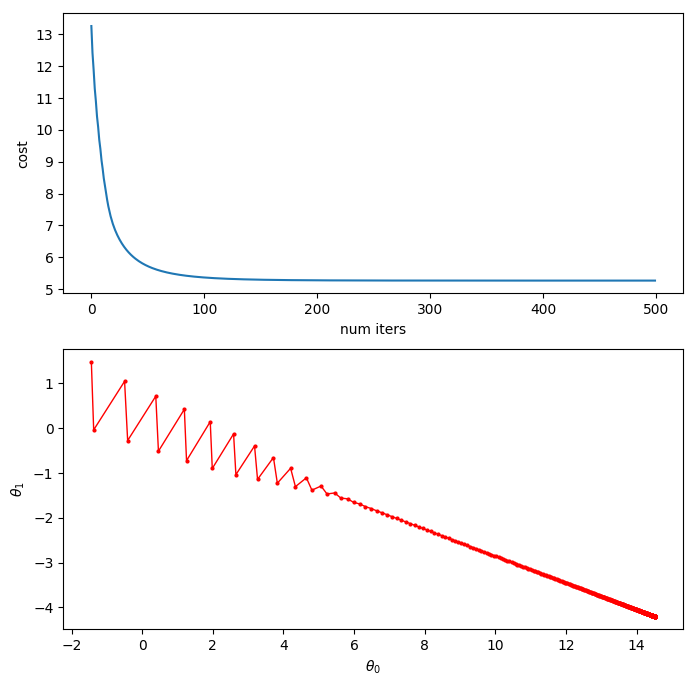

In [10]:
# We add a column of 1s to X so that we also add an intercept term
X_ones = np.concatenate((X, np.ones((X.shape[0],1))), axis = 1)

# We optimize
lg_result = logistic_regress_optim(X_ones, Y, 0.5, 500) # 0.5 es el learning rate si lo incremento mucho a lo mejor converjo antes pero es mas inestable

f, ax = plt.subplots(2,1)

# We plot the cost function as a function of the optimization steps
ax[0].plot(lg_result['cost_evol']);
ax[0].set_xlabel('num iters')
ax[0].set_ylabel('cost')

# We also plot the evolution of the parameters 
ax[1].plot(lg_result['theta_evol'][0], lg_result['theta_evol'][1], '-o', 
           color='red', markersize = 2, linewidth=1);
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')


f.set_size_inches(8,8);


Grafico de abajo enseña hacia donde va el gradiente

Es importante tener en cuenta la tasa de aprendizaje 

In [11]:
# We make a 3D plot of the parameters together with the cost function
plot_optim_plot(X_ones, Y, lg_result)

Output hidden; open in https://colab.research.google.com to view.

La grafica, la parte azul, es la función objetivo, y lo rojo es como voy convergiendo al punto optimo, que es el minimo!

We now compare the predictions for the original and the augmented data

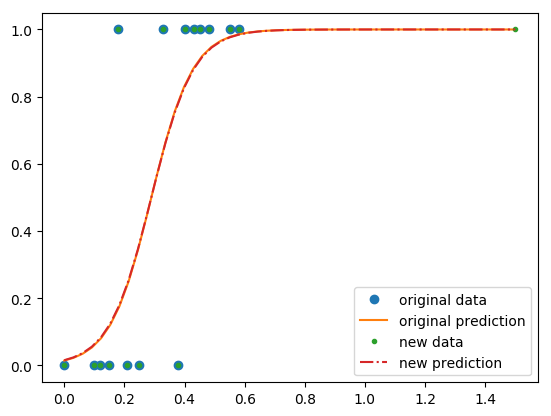

In [12]:
X_to_predict = np.linspace(0,1.5).reshape(-1,1)
X_to_predict_ones = np.concatenate((X_to_predict, np.ones((X_to_predict.shape[0],1))), axis = 1)

Y_predict = sigmoid(np.matmul(X_to_predict_ones, lg_result['theta']))

plt.plot(X,Y, 'o', label = 'original data')
plt.plot(X_to_predict, Y_predict, label = 'original prediction')

X_new_ones = np.concatenate((X_new, np.ones((X_new.shape[0],1))), axis = 1)

lg_result = logistic_regress_optim(X_new_ones, Y_new, 0.5, 300)

Y_predict_new = sigmoid(np.matmul(X_to_predict_ones, lg_result['theta']))

plt.plot(X_new,Y_new, '.', label = 'new data')
plt.plot(X_to_predict, Y_predict_new, '-.',label = 'new prediction') 

plt.legend();


Esto evita que los outliers no tengan un efecto excesivamente fuerte.

Este modelo nos sirve para clasificar, es decir, la linea roja define la evolución de la probabilidad en función de los X, por lo tanto habria que fijar un punto a partir del cual tendremos un 1 o un 0, por ejemplo, podriamos fijar 0.5 como valor de corte

## Logistic regression in Scikit-Learn

Logistic regression is available in [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). It considers both  $l1$ (Lasso) and $l2$ (Ridge) regularization. The regularization parameter $\lambda$ is specified by its inverse $C=\frac{1}{\lambda}$, so that smaller values imply stronger regularization.

Notice that classification models in Scikit-Learn have a **predict_proba** method that gives the probability of each of the possible outcomes. 

A **predict** method is also available that predicts $1$ if $P\left[Y=1|X\right]>0.5$ and $0$ otherwise.

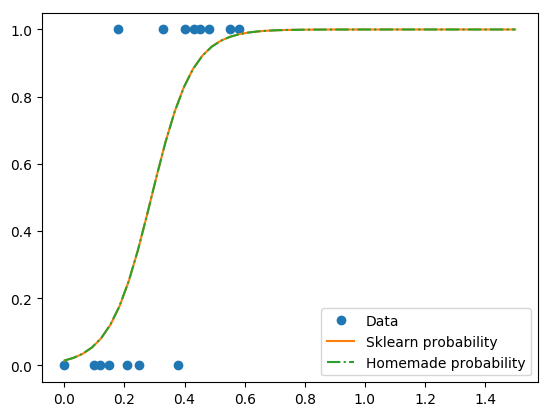

In [13]:
# Sklearn logistic regression
from sklearn.linear_model import LogisticRegression

# We define the model
log_reg_model = LogisticRegression(fit_intercept=True, C=1e10, solver = 'lbfgs')

# We fit the model
log_reg_model.fit(X, Y[:,0])

# We predict in the previously defined grid
Y_predict_sklearn = log_reg_model.predict_proba(X_to_predict);

# We plot the results together with the results
# obtained with our own implementation
plt.plot(X,Y, 'o', label = 'Data')

plt.plot(X_to_predict,Y_predict_sklearn[:,1], label='Sklearn probability')
plt.plot(X_to_predict,Y_predict, '-.', label='Homemade probability');

plt.legend()


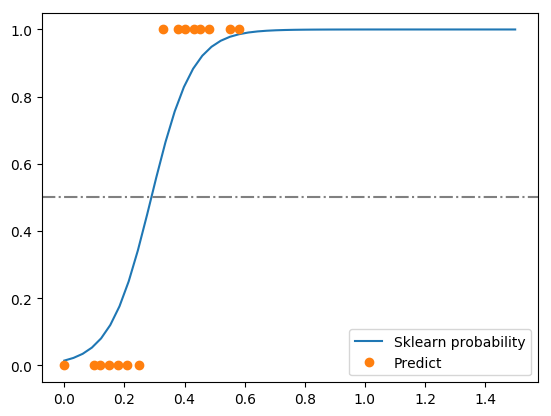

In [14]:
plt.plot(X_to_predict,Y_predict_sklearn[:,1], label='Sklearn probability')
plt.plot(X,log_reg_model.predict(X), 'o', label = 'Predict')

plt.axhline(0.5, color='grey', linestyle = '-.')

plt.legend();


## Logistic regression for a non linear problem

In order to use logistic regression with a real dataset where the problem is not well fitted with a linear logistic regression model, we will use the 2016-2017 NBA shots statistics [NBA Shots](https://www.kaggle.com/dansbecker/nba-shot-logs). We will try to estimate the probability of a made shot given the shot distance.  

In [15]:
# We read the file
nba_shots = pd.read_csv(PATH + 'nba-shot-logs.zip')

# We print the columns
print(nba_shots.columns)

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')


In [16]:
# We display the 2 columns of interest

nba_shots[['SHOT_DIST', 'SHOT_RESULT']].head(5)

,SHOT_DIST,SHOT_RESULT
0,7.7,made
1,28.2,missed
2,10.1,missed
3,17.2,missed
4,3.7,missed


We change 'made' and 'missed' by $1$ and $0$ respectively

In [17]:
nba_shots['SHOT_RESULT'] = nba_shots['SHOT_RESULT'].apply(lambda x: 1 
                                                          if x=='made' else 0)

nba_shots[['SHOT_DIST', 'SHOT_RESULT']].head()

,SHOT_DIST,SHOT_RESULT
0,7.7,1
1,28.2,0
2,10.1,0
3,17.2,0
4,3.7,0


And plot the histogram of the shot distance and the shot distance of the made shots

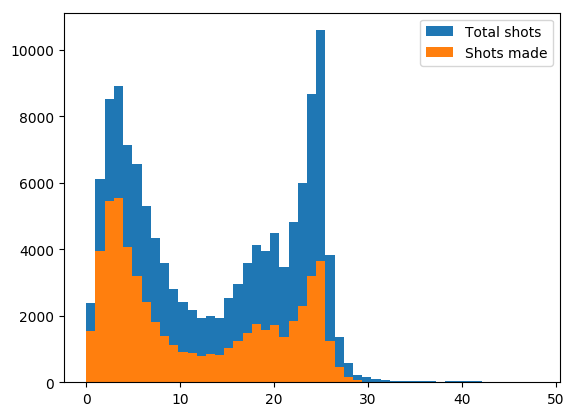

In [18]:
# We generate a grid of shot distances
dist_grid = np.linspace(0,np.ceil(nba_shots['SHOT_DIST'].max()),endpoint=True)

# We generate the histogram of the shot distances for such a grid
hist_total = np.histogram(nba_shots['SHOT_DIST'], bins = dist_grid)

# We generate the histogram of the shot distances conditional for made shots
hist_made = np.histogram(nba_shots[nba_shots['SHOT_RESULT']==1]['SHOT_DIST'], bins = dist_grid)

# We plot both histograms
plt.bar(dist_grid[1:]-0.5, hist_total[0], 1, label = 'Total shots')

plt.bar(dist_grid[1:]-0.5, hist_made[0], 1, label = 'Shots made')

plt.legend();

Let's calculate the probability of a made shot for each histogram bin and compare it with the probability predicted by a logistic regression model with the distance as the only explanatory variable.

In [0]:
# PolynomialFeatures will compute the powers of X
from sklearn.preprocessing import PolynomialFeatures

# To chain transformers and estimator
from sklearn.pipeline import Pipeline

# Scaler of data
from sklearn.preprocessing import StandardScaler

def FitNBAData(nba_shots, C=10000, degree = 1, max_iter = 500):

    # Logistic regression model. C represents the inverse of the weight given
    # to the regularization term
    # degree: polynomial order
    # nba_shots: Dataframe

    # We define the steps as a dictionary 
    steps = [('Transfor_X_to_Powers', PolynomialFeatures(degree=degree)),('scaler', StandardScaler()), 
             ('Regression', LogisticRegression(fit_intercept=True, C=C, solver = 'lbfgs', 
                                     max_iter=max_iter))]

    # Pipeline is defined
    pipeline = Pipeline(steps)

    # We generate a grid of shot distances
    dist_grid = np.linspace(0,np.ceil(nba_shots['SHOT_DIST'].max()),endpoint=True)

    # We generate the histogram of the shot distances for such a grid
    hist_total = np.histogram(nba_shots['SHOT_DIST'], bins = dist_grid)

    # We generate the histogram of the shot distances conditional for made shots
    hist_made = np.histogram(nba_shots[nba_shots['SHOT_RESULT']==1]['SHOT_DIST'], bins = dist_grid)

    dist_grid = dist_grid.reshape(-1,1)

    # X will be comprised of distance 
    X = np.array(nba_shots['SHOT_DIST']).reshape(-1,1)

    # We fit the model
    pipeline.fit(X, nba_shots['SHOT_RESULT'])

    # We predict the probability
    predict_proba = pipeline.predict_proba(dist_grid)


    # We plot the data prob together with the model prob
    plt.bar(dist_grid[1:,0]-0.5, hist_made[0]/hist_total[0], label = 'Probability in data')

    plt.plot(dist_grid, predict_proba[:,1], 'r', label = 'Probability predicted by the model')

    plt.legend();


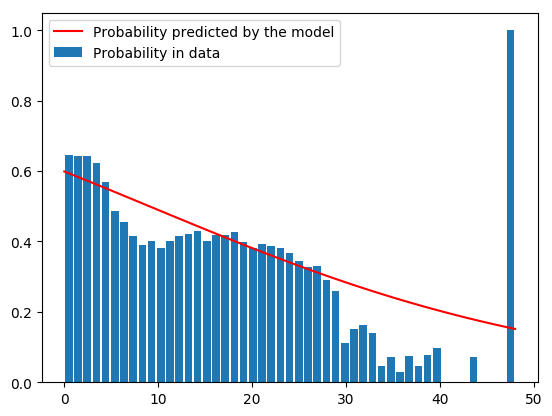

In [20]:
FitNBAData(nba_shots, C=10000, degree = 1, max_iter = 500)


As can be seen in the previous picture, the model suffers from  bias. In order to make it more flexible, let's add powers of shot distance.

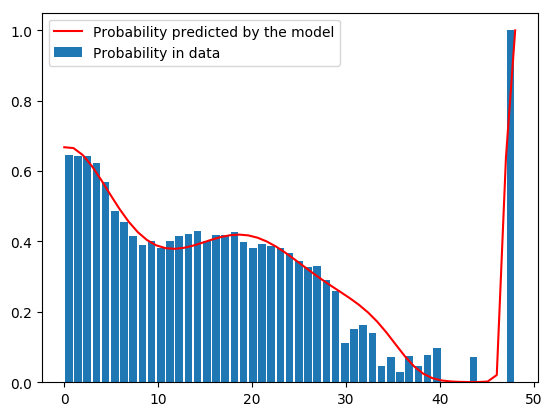

In [21]:
FitNBAData(nba_shots, C=10000, degree = 10, max_iter = 500) # Añade mas variables explicativas y mejora el modelo - Pero overfittea

Esta grafica representaria que cuando alguien tira desde 50 metros la va a meter, esto esta claramente mal, por que ese dato es un claro outlier! Por lo tanto habria que hacer CrossValidation

With up to the 10th power, it seems that we suffer from variance. In order to avoid it, let's perform a grid search over C and order.


## Cross validating logistic regression

We create a pipeline with a polynomial features transformer, a standard scaler and logistic regression.


In [0]:
steps = [('Transfor_X_to_Powers', PolynomialFeatures(degree = 10)),
         ('scaler', StandardScaler()), 
         ('Log Reg', LogisticRegression(fit_intercept=True, C=10000, 
                                        solver = 'lbfgs', max_iter=500))]

pipeline = Pipeline(steps)


Let's check it works

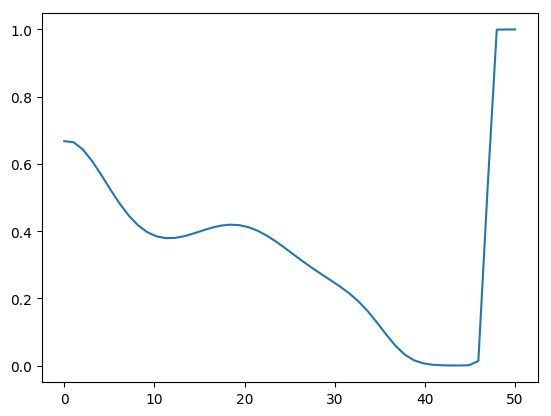

In [23]:
# We define X & Y
X = np.array(nba_shots['SHOT_DIST']).reshape(-1,1)
Y = nba_shots['SHOT_RESULT']

# We fit the pipeline
pipeline.fit(X,Y);

# We predict in a grid
X_Pred = np.linspace(0,50).reshape(-1,1)
Y_Pred = pipeline.predict_proba(X_Pred)[:,1]

# We plot the estimated made shot probability
plt.plot(X_Pred, Y_Pred);

Let's do a grid search in both $C=\frac{1}{\lambda}$ and the polynomial order.

In [24]:
X[0:10]
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: SHOT_RESULT, dtype: int64

In [0]:
# To split data in train and test
from sklearn.model_selection import train_test_split

# To perform a grid search
from sklearn.model_selection import GridSearchCV

# We do a random test split leaving out 20% of the data to test the model
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=45)

# We define the grid search params
parameteres = {'Transfor_X_to_Powers__degree':[2, 4, 5, 10], 'Log Reg__C':np.logspace(0,4,5)}

# We define the grid (5 fold cross validation)
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, verbose = 1, refit=True) # En este caso hace grid search sobre el polinomio y el C del la regresion logistica

# We fit the model
grid.fit(X_train,y_train)

clear_output()

Let's print the best set of hyperparameters found and the best score. As score we have used the model accuracy (percentage of data where the model predicts the true value).

In [26]:
print('Best params: ', grid.best_params_)
print('Best score: ', grid.best_score_)

Best params:  {'Log Reg__C': 1000.0, 'Transfor_X_to_Powers__degree': 4}
Best score:  0.6095066126592162


Indica la probabilidad de acierto, en este caso es solo en función de la distancia. Habria que incluir mas features, no solo la distancia...

Let's obtain the model accuracy in test.

In [27]:
grid.score(X_test, y_test)

0.6109549465136254

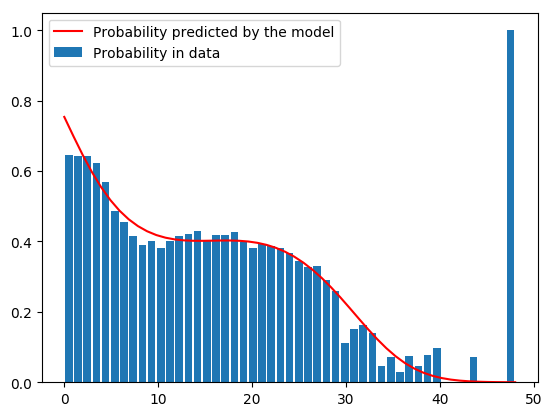

In [28]:
FitNBAData(nba_shots, C=1000, degree = 4, max_iter = 500)

In [29]:
nba_shots.SHOT_RESULT.mean()

0.4521390812764994

## Logistic regression for unbalanced data

Let's now consider the problem of unbalanced data. By unbalanced data we mean binary classification problems where the probability of one of the 2 possible outcomes is not in the order of $0.5$.

To give an example, imagine that the probability of one of the events was 1%. Under such circumstance a model that predicted always the outcome with 99% probability would have an accuracy of 99%. In this situations, the model accuracy is not a good score.

As an example of a classification dataset with unbalanced data, we are using [Santander Customer Transaction Prediction](https://www.kaggle.com/c/santander-customer-transaction-prediction). This was a [Kaggle](https://www.kaggle.com/) competition where the target was to predict a customer transaction given some predictors.

In [30]:
# We read the file
zf = zipfile.ZipFile(PATH + 'santander-customer-transaction-prediction.zip')

# And obtain the name of the files within the .zip
zf.namelist()

['train.csv', 'sample_submission.csv', 'test.csv']

Let's read 'train.csv'

In [0]:
# We read the train dataset (only dataset with outcome)
santander_data = pd.read_csv(zf.open('train.csv'))

Let's see the columns

In [32]:
santander_data.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

Let's explore the histogram of some features

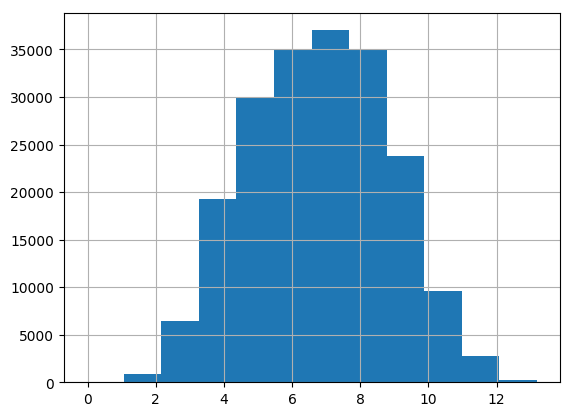

In [33]:
santander_data.var_3.hist(bins=12);

We print the length of the dataframe and the probability of no transaction.

In [34]:
# Length of DF
print('Length of dataframe: ', len(santander_data))

# Probability of no transaction
print('Probability of no transaction:', 1-santander_data['target'].mean())

Length of dataframe:  200000
Probability of no transaction: 0.89951


We fit a logistic regression model with a standard scaler transformer to the data

In [35]:
%%time

# To shuffle the data
from sklearn.utils import shuffle

# We build the predictors and response
X = santander_data.drop(['ID_code','target'], axis=1)
Y = santander_data['target']

# We shuffle the data
X, Y = shuffle(X,Y)

# We build our pipeline
steps = [('scaler', StandardScaler()), 
         ('Log Reg', LogisticRegression(fit_intercept=True, C=10000, solver = 'lbfgs', max_iter=500))]

model = Pipeline(steps)

# We fit the model
model.fit(X,Y);

CPU times: user 3.37 s, sys: 995 ms, total: 4.37 s
Wall time: 3.36 s


model.score will return the most widely used score for logistic regression. That is model accuracy

In [36]:
# Print model score
print('Model score: ', model.score(X,Y))

# Test if
print('Test accuracy: ', np.mean(model.predict(X)==Y))

Model score:  0.91451
Test accuracy:  0.91451


Probabilidad de no hacer transancion es del 91% - por que el modelo esta desbalanceado! Habria que proceder primero a rebalancearlo y luego repetir el modelo y ver los resultados

**When data is unbalanced, does it make sense to use the $0.5$ threshold to predict?**

# Confusion matrix

When data is unbalanced, we might consider changing the prediction threshold.

Given a threshold, we can represent the confusion matrix, where we represent the proportion of true positives (**TP**: predicted as positive that are positive), false positives (**FP**: predicted as positive that are negative), true negatives (**TN**: predicted as negative that are negative), false negatives (**FN**: predicted as negative that are negative).

This matrix can be represented for train, cross validation and test sets.


Accuracy - Suma de la diagonal principal, dividida del total

Precision -   No genera falsos positivos - lo que hace es TP /(TP + FP) - Es excesivamente restrictivo, por lo que no necesariamente es bueno

Recall - De todos los positivos que hay en la población, cuantos positivos realmente caza es decir TP / (TP  + FN) - 100% tampoco es bueno

False Negative Rate - 

Lo que se busca es un promedio de Recall y precissio, mediante una media armonica (F1 Score) - Esto sería lo optimo, buscaremos el punto donde se maximiza el F1 

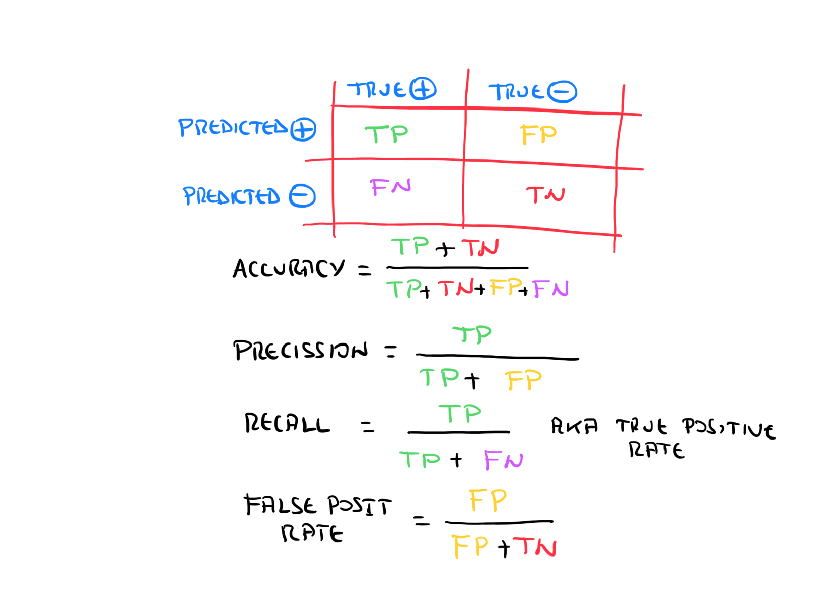

In [0]:
#@title Confusion matrix
plot_image(PATH + 'Conf_Matrix.PNG',10,10)

We compute the probability of a transaction given by the model

In [0]:
y_prob = model.predict_proba(X)[:,1]

In [38]:
#@title Conf. matrix { run: "auto", form-width: "50%" }
TH = 0.36 #@param {type:"slider", min:0, max:1, step:0.01}
from sklearn.metrics import confusion_matrix

ypred = (y_prob>TH).astype(float) 

CM = confusion_matrix(Y, ypred)/len(santander_data)


TABLE = pd.DataFrame(columns = ['PRED -','PRED +'], 
                     index = ['TRUE -','TRUE +'], data =CM)

display(TABLE)

tp = TABLE.loc['TRUE +', 'PRED +',]
fp = TABLE.loc['TRUE -', 'PRED +']
tn = TABLE.loc['TRUE -', 'PRED -']
fn = TABLE.loc['TRUE +', 'PRED -']

accuracy = (tp+tn)/(tp+fp+tn+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
FPR = (fp)/(fp+tn)


print('-------------------------')

print('Accuracy', '{:.1%}'.format(accuracy))
print('Precision', '{:.1%}'.format(precision))
print('Recall', '{:.1%}'.format(recall))
print('FPR', '{:.1%}'.format(FPR))

print('-------------------------')


# plt.plot([0,1],[0,1])

# plt.plot(CM[1,0]/(CM[1,0]+CM[0,0]),CM[1,1]/(CM[1,1]+CM[0,1]),'o')


# plt.gcf().set_size_inches(2,2)

,PRED -,PRED +
TRUE -,0.869730,0.029780
TRUE +,0.060145,0.040345


-------------------------
Accuracy 91.0%
Precision 57.5%
Recall 40.1%
FPR 3.3%
-------------------------


# Accuracy, precision, recall, false positive rate, $F_1$ score

Associated with this matrix, we have severall ratios (here we describe some of them):

* **Accuracy**: What percentage of the data we classified corrently.
* **Precission**: Percentage of predicted positives that are actually positive.
* **Recall**: Percentage of actual positives that have been classified as positive (also known as **true positive rate**).
* **False positive rate**: Percentage of actual negatives that have been classified as positive.

**As already stated, high accuracy can be misleading with unbalanced data.**

Having high precission and high recall both seem positive, although:

* The higher the threshold, the higher the precision.
* The higher the threshold, the lower the precision.

So that finding the right threshold is a compromise between both. A score sometimes used to find the optimal threshold is the $F_1$ score, which is the harmonic mean of both.

$$\frac{1}{F_1}=\frac{1}{2}\left(\frac{1}{Prec}+\frac{1}{Rec}\right)$$

In [0]:
def plot_prec_recall(y_prob,Y, num_points):
    # This function plots precision, recall, false positive rate, 
    # accuracy and F1 score as a function of the threshold used
    # y_prob: Probability of 1 given by a model
    # Y: actual data
    # num_points: number of points to consider in the threshold grid

    # We define the threshold as a linear grid
    Threshold = np.linspace(0,1,num_points,False)

    # We initialize the arrays that will contain the 
    # different metrics
    prec_array = []
    recall_array = []
    FPR_array = []
    F1_array = []
    accuracy = []
 
    for i,TH in enumerate(Threshold): 
        # We iterate over threshold

        # We predict Y given the threshold
        ypred = (y_prob>TH).astype(float) 

        # We build the confusion matrix
        CM = confusion_matrix(Y, ypred)/len(santander_data)

        tp = CM[1,1] # true positive
        fp = CM[0,1] # false positive
        tn = CM[0,0] # true negative
        fn = CM[1,0] # false negative

        # Precision
        prec = tp/(tp+fp)
        prec_array += [prec]

        # Recall
        rec = tp/(tp+fn)
        recall_array += [rec]

        # False positive rate
        FPR_array += [(fp)/(fp+tn)]

        # F1 score
        F1_array += [2*prec*rec/(prec+rec)]
        accuracy += [(tp+tn)]

        clear_output()
        print(str((i+1)) + '/' + str(len(Threshold)))

    # We plot the different metrics  
    plt.plot(Threshold, prec_array, label = 'Precision')
    plt.plot(Threshold, recall_array, label = 'Recall')
    plt.plot(Threshold, FPR_array, label = 'FPR')
    plt.plot(Threshold, F1_array, label = r'$F_1$')
    plt.plot(Threshold, accuracy, label = 'Accuracy', color = 'grey')
  
    plt.xlabel('Threshold')


    plt.legend();


We plot precision, recall, false positive rate, accuracy and F1 score for our logistic regression model

20/20


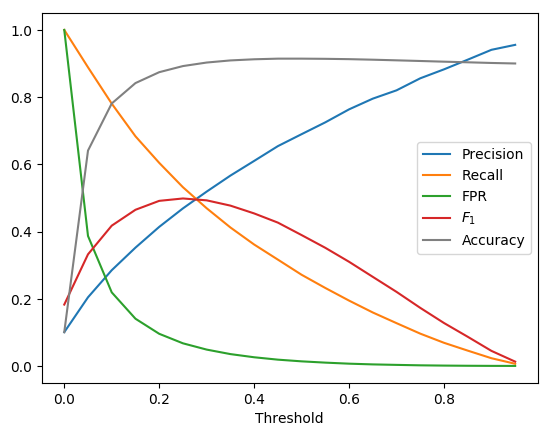

In [40]:
plot_prec_recall(y_prob,Y,20)

Podemos observar que se maximiza el valor del $F_{1}$ en torno al 0.3

Recall 100% es que todos son positivos (no vale)

Let's do the same for a model that randomly predicted the outcome

50/50


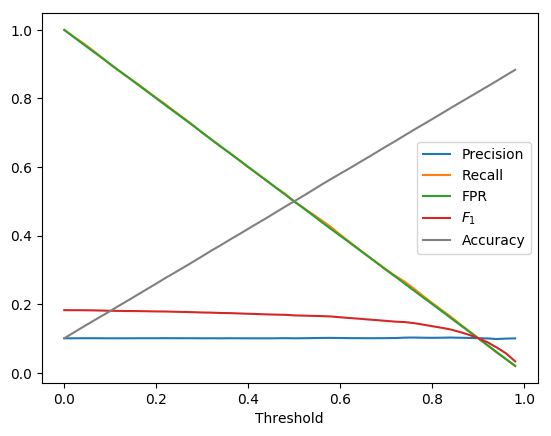

In [41]:
# We obtain the probability of a transaction randomly ~U[0,1]
random_prob = np.random.uniform(0,1,len(Y))

plot_prec_recall(random_prob,Y,50)

# ROC curve

In the last two plots we can see that:

* For the random guess, both recall (TPR) and FPR evolve linearly as a function of the threshold
* In our logistic regression model they evolve under convex curves with different convexity. FPR decreases more sharply than TPR. 

The ROC curve is a parametric representation of FPR (x-axis) and TPR (y-axis) by changing the threshold. As we can see in the next plot, it is linear for a ramdon guess and lies above this linear relationship for a meaningful model. 

The area under such curve (**AUC**) will provide a score of the model regardless of the threshold used.

* Random guess model has AUC=0.5
* Perfect model has AUC =1

AUC can be used as a score to find the best logistic regression model through cross validation.

Area under ROC curve:  0.861283025810409


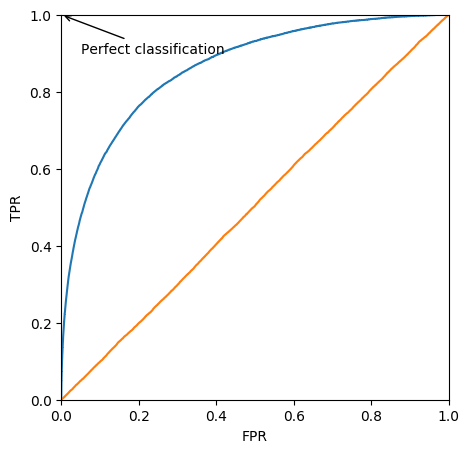

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, y_prob)

plt.plot(fpr,tpr)

fpr, tpr, thresholds = roc_curve(Y, random_prob)

plt.plot(fpr,tpr)

plt.xlim(0,1)
plt.ylim(0,1)

plt.annotate('Perfect classification', xy = (0,1), xytext = (0.05,0.9), arrowprops ={'arrowstyle':'->'})

f = plt.gcf()

f.set_size_inches(5,5)

plt.xlabel('FPR')
plt.ylabel('TPR')


print('Area under ROC curve: ', roc_auc_score(Y,y_prob))


Podemos ver la evolución de TPR y FPR en fución de la evolución del Threshold

Todo modelo de clasificación parte de la linea naranja y a mayor area debajo de la linea azul, mejor es el modelo

# Multiclass classification

Multiclass classification problems are those where the number of categories $Y$ can take are greater than 2 ($n_c>2$).

# One vs all logistic regression

Given $n_c$ classes, one vs all logistic regression consists of $n_c$ independent logistic regression problems for each category $C_j$. Under each of these problems we consider $Y=1$ if $Y=C_j$ and 0 otherwise.

# Softmax regression

Softmax regression is a more robust alternative to logistic regression. For each posible class $C_j$, we have a variable $z_j$ that is a linear combination of the features:

$$z_j=W_j^TX+b_j$$

Where $W_j$ is the vector containing the coefficients and $b_j$ the bias term associated to $C_j$.

In matrix form, we can write:

$$\underbrace{Z}_{n_c\times 1}=\underbrace{W}_{n_c\times n_x}\underbrace{X}_{n_x\times 1}+\underbrace{b}_{n_c\times 1}$$

The probability of class $C_j$ given $X$ is given by

$$P_j = P\left[Y=C_j|X\right]=\frac{\exp\left(z_j\right)}{\sum_{k=1}^{n_c}\exp\left(z_k\right)}$$

The cost function to be minimized is obtained through maximum likelyhood:



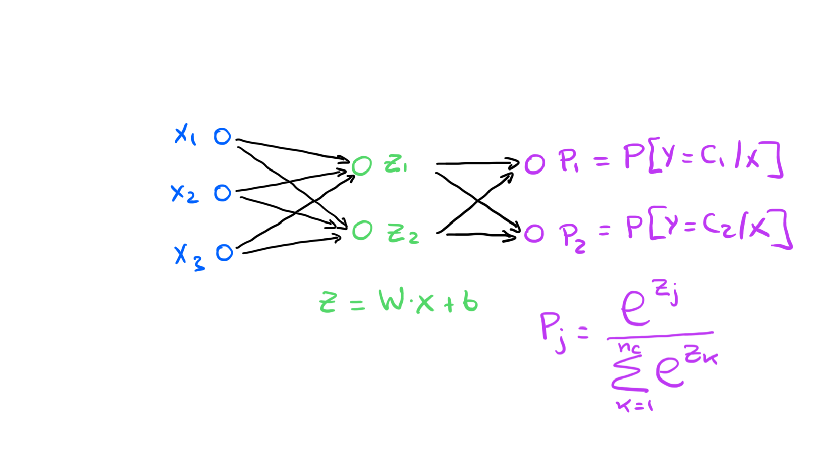

In [0]:
#@title Sofmax regression
plot_image(PATH + 'softmax.PNG',10,10)

Cada variable $Z_{i}$ es una combinación lineal de los features $X$ (inputs) - es decir, es una regresión lineal de los inputs, que genera $Z$ en el espacio $(-\infty, \infty)$, esto lo transformare en probabilidades siguiendo la formula $P_{j}$

Basicamente tengo un modelo donde genero variables intermedias $Z_{i}$ que coincide con el numero de clases en las que quiero clasificar, por ejemplo, clasificar entre gato, perro y loro seria tener 3 $Z$, obtendré la probabilidad de cada $Z_{i}$ y clasificaré cogiendo aquella que tenga mayor probabilidad ($P_{j}$)

# Real world application: handwritten digit recognition

As as example where softmax regression can be applied, we are using the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. This is a dataset comprised of labeled hadwritten digits.

Our target is to build a machine learning model that can classify them.

We download the dataset:

In [42]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print('x_train dimensions: ')
print(x_train.shape)

# Tiene 60k Imagenes, con 28 filas y 28 columnas, que representa los tonos (0 es blanco)

11493376/11490434 [==============================] - 0s 0us/step
x_train dimensions: 
(60000, 28, 28)


In [56]:
len(x_test)

10000

Se van a crear 60k columnas de 28X28 longitud - es decir una columna para cada imagen.

Para cada elemento de cada columna se va a generar una combinación lineal para cada uno de los numeros (0 - 10), la incognita es el peso que tiene cada pixel para cada punto, luego se aplica la transformación $P_{j}$ y el que tenga mayor probabilidad, es el numero.

Let's explore its content:

Image labeled as 0


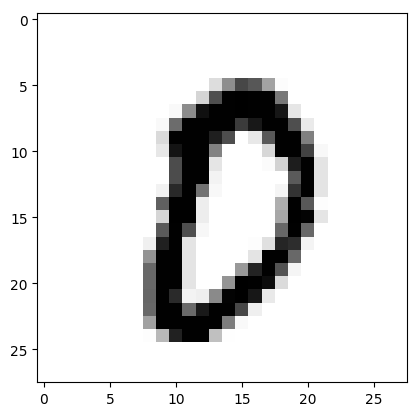

In [43]:
# Feel free to input any integer between 0 and 59999
image_index = 12456
print('Image labeled as ' + str(y_train[image_index]))
plt.imshow(x_train[image_index], cmap='Greys');


Let's train the model using only 10000 pictures:

In [49]:
# We flatten X - para crear el vector - esto es TRAIN
X = x_train[0:10000].reshape(10000,28*28)/255

Y = y_train[0:10000]

model = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial', max_iter = 300)

model.fit(X,Y)


print('Model test score: ', np.mean(Y==model.predict(X)))

print('Model score: ', model.score(X,Y))

Model test score:  0.9691
Model score:  0.9691


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



La probabilidad de acierto es del  96.73 en la muestra de train

In [54]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let's see how the model performs in unseen data

In [46]:
X_test = x_train[10000:20000].reshape(10000,28*28)/255
Y_test = y_train[10000:20000]
# Usando el modelo que ya he ajustado, model
print('Model score in test: ', model.score(X_test,Y_test))

Model score in test:  0.8975


Este modelo podría ser muy sencillo, es decir, adolecer de Biass

Let's explore the model parameters

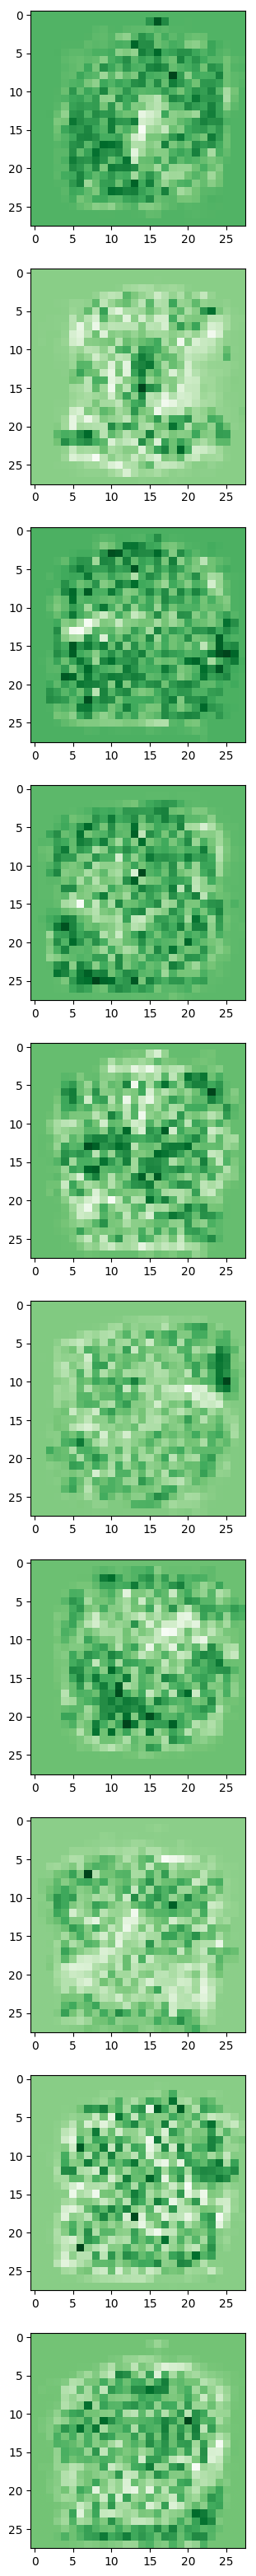

In [55]:
f, ax = plt.subplots(10)

for i in range(10):

    ax[i].imshow(model.coef_[i].reshape(28,28),cmap='Greens')
  
f.set_size_inches(10,40)

In [0]:
Y_test_pred = model.predict(X_test)

Labeled as  3
Predicted  3


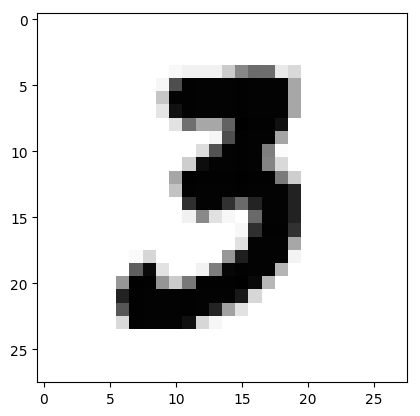

In [60]:
image_index = np.random.randint(0,10000)

print('Labeled as ',Y_test[image_index]) # The label is 8
print('Predicted ',Y_test_pred[image_index]) # The label is 8
plt.imshow(x_train[10000:20000][image_index], cmap='Greys'); 

Labeled as  1
Predicted  5


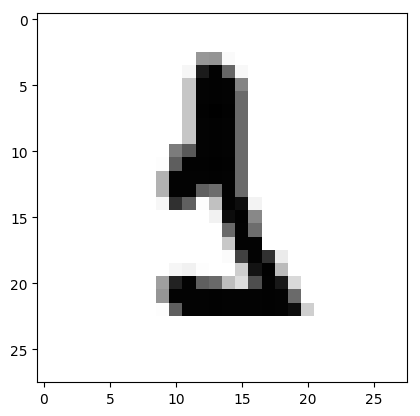

In [0]:
#@title Default title text { run: "auto" }
number = 1 #@param ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] {type:"raw"}
index = 21 #@param {type:"slider", min:0, max:100, step:1}


Y_test_pred_proba = model.predict_proba(X_test)
Y_test_pred = model.predict(X_test)

probs = Y_test_pred_proba[:,number][Y_test == number]

image_index = probs.argsort()[index]

print('Labeled as ',Y_test[Y_test == number][image_index]) # The label is 8
print('Predicted ',Y_test_pred[Y_test == number][image_index]) # The label is 8
plt.imshow(x_train[10000:20000][Y_test == number][image_index], cmap='Greys'); 